In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.getcwd()

'C:\\Users\\Andrew'

In [3]:
os.chdir('C://Users//Andrew/Desktop/')

In [4]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [6]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [7]:
df_copy = df.copy()

In [8]:
df.shape

(63023, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [10]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [11]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [13]:
location_column = ['Regionname', 'CouncilArea', 'Suburb', 'Propertycount', 'Address', 'Postcode','Distance']
house_att_column = ['Type', 'Rooms', 'Method', 'Date']
seller = ['SellerG']
price = ['Price']

In [14]:
new_col_order = location_column + house_att_column + seller + price

In [15]:
set(df.columns) == set(new_col_order)

True

In [16]:
df2 = df[new_col_order]
df2.head()

,Regionname,CouncilArea,Suburb,Propertycount,Address,Postcode,Distance,Type,Rooms,Method,Date,SellerG,Price
0,Northern Metropolitan,Yarra City Council,Abbotsford,4019,49 Lithgow St,3067,3.0,h,3,S,1/04/2017,Jellis,1490000.0
1,Northern Metropolitan,Yarra City Council,Abbotsford,4019,59A Turner St,3067,3.0,h,3,S,1/04/2017,Marshall,1220000.0
2,Northern Metropolitan,Yarra City Council,Abbotsford,4019,119B Yarra St,3067,3.0,h,3,S,1/04/2017,Nelson,1420000.0
3,Western Metropolitan,Moonee Valley City Council,Aberfeldie,1543,68 Vida St,3040,7.5,h,3,S,1/04/2017,Barry,1515000.0
4,Western Metropolitan,Moonee Valley City Council,Airport West,3464,92 Clydesdale Rd,3042,10.4,h,2,S,1/04/2017,Nelson,670000.0


## Exploratoty Data Analysis

In [17]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [18]:
df2.describe(percentiles= [.01, .3, .99])

,Propertycount,Postcode,Distance,Rooms,Price
count,63023.000000,63023.000000,63023.000000,63023.000000,4.843300e+04
mean,7617.728131,3125.673897,12.684829,3.110595,9.978982e+05
std,4424.423167,125.626877,7.592015,0.957551,5.934989e+05
min,39.000000,3000.000000,0.000000,1.000000,8.500000e+04
1%,892.000000,3011.000000,1.600000,1.000000,3.120000e+05
30%,4794.000000,3064.000000,7.700000,3.000000,6.550000e+05
50%,6795.000000,3107.000000,11.400000,3.000000,8.300000e+05
99%,21650.000000,3756.000000,38.000000,5.000000,3.200000e+06
max,21650.000000,3980.000000,64.100000,31.000000,1.120000e+07


In [19]:
df2.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
Regionname,63023,8,Southern Metropolitan,17559
CouncilArea,63023,34,Boroondara City Council,5132
Suburb,63023,380,Reservoir,1241
Address,63023,57754,57 Bay Rd,7
Type,63023,3,h,45053
Method,63023,9,S,34063
Date,63023,112,24/03/2018,1144
SellerG,63023,476,Barry,6894


### Highest value properties sold with corresponding agent

In [20]:
Sellers = df2[['SellerG', 'Price']]
Sellers.head()

,SellerG,Price
0,Jellis,1490000.0
1,Marshall,1220000.0
2,Nelson,1420000.0
3,Barry,1515000.0
4,Nelson,670000.0


In [21]:
Sellers.nlargest(30, 'Price').head(10)

,SellerG,Price
59166,hockingstuart,11200000.0
61142,Hall,9000000.0
23841,Sotheby's,8000000.0
33780,Abercromby's,7650000.0
51592,Kay,7000000.0
30496,Marshall,6800000.0
1593,Marshall,6700000.0
7825,Marshall,6600000.0
17683,Jellis,6600000.0
24587,Jellis,6500000.0


### Exploring home and townhouse prices by northern and souther metropolitan area


In [22]:
home_search1 = df2.Type == 'h'
home_search2 = df2.Price > 500000.0
home_search3 = (df2.Regionname == 'Northern Metropolitan') | (df2.Regionname == 'Southern Metropolitan')


townhouse_search1 = df2.Type == 't'
townhouse_search2 = df2.Price > 500000.0
townhouse_search3 = (df2.Regionname == 'Northern Metropolitan') | (df2.Regionname == 'Southern Metropolitan')

home_search_final = home_search1 & home_search2 & home_search3
townhouse_search_final = townhouse_search1 & townhouse_search2 & townhouse_search3

In [23]:
df2[home_search_final].head()

,Regionname,CouncilArea,Suburb,Propertycount,Address,Postcode,Distance,Type,Rooms,Method,Date,SellerG,Price
0,Northern Metropolitan,Yarra City Council,Abbotsford,4019,49 Lithgow St,3067,3.0,h,3,S,1/04/2017,Jellis,1490000.0
1,Northern Metropolitan,Yarra City Council,Abbotsford,4019,59A Turner St,3067,3.0,h,3,S,1/04/2017,Marshall,1220000.0
2,Northern Metropolitan,Yarra City Council,Abbotsford,4019,119B Yarra St,3067,3.0,h,3,S,1/04/2017,Nelson,1420000.0
9,Southern Metropolitan,Port Phillip City Council,Albert Park,3280,18 Mills St,3206,3.0,h,3,S,1/04/2017,Cayzer,1925000.0
12,Northern Metropolitan,Darebin City Council,Alphington,2211,55 Fulham Rd,3078,5.7,h,2,S,1/04/2017,Miles,1675000.0


In [24]:
df2[townhouse_search_final].head()

,Regionname,CouncilArea,Suburb,Propertycount,Address,Postcode,Distance,Type,Rooms,Method,Date,SellerG,Price
25,Southern Metropolitan,Boroondara City Council,Ashburton,3052,61A Victory Bvd,3147,10.2,t,3,S,1/04/2017,Jellis,1610000.0
32,Southern Metropolitan,Boroondara City Council,Balwyn,5682,2/362 Belmore Rd,3103,7.9,t,2,PI,1/04/2017,Walshe,700000.0
51,Southern Metropolitan,Glen Eira City Council,Bentleigh,6795,4b Hobart St,3204,11.4,t,4,VB,1/04/2017,hockingstuart,1300000.0
52,Southern Metropolitan,Glen Eira City Council,Bentleigh,6795,36a Marquis Rd,3204,11.4,t,4,PI,1/04/2017,hockingstuart,1500000.0
57,Southern Metropolitan,Glen Eira City Council,Bentleigh East,10969,35 Highview Rd,3165,13.8,t,2,S,1/04/2017,hockingstuart,775000.0


In [25]:
cols = ['Type', 'Price', 'Regionname']
homes_filtered = df2.loc[home_search_final, cols]
homes_filtered.head()

,Type,Price,Regionname
0,h,1490000.0,Northern Metropolitan
1,h,1220000.0,Northern Metropolitan
2,h,1420000.0,Northern Metropolitan
9,h,1925000.0,Southern Metropolitan
12,h,1675000.0,Northern Metropolitan


In [26]:
townhouse_filtered = df2.loc[townhouse_search_final, cols]
townhouse_filtered.head()

,Type,Price,Regionname
25,t,1610000.0,Southern Metropolitan
32,t,700000.0,Southern Metropolitan
51,t,1300000.0,Southern Metropolitan
52,t,1500000.0,Southern Metropolitan
57,t,775000.0,Southern Metropolitan


### Target Variable House Price

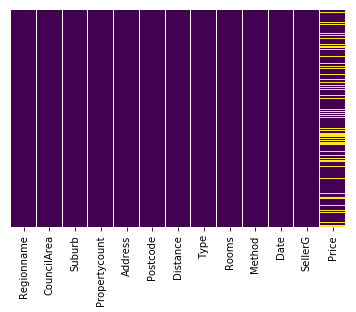

In [27]:
sns.heatmap(df2.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

In [28]:
df2.isnull().sum()

Regionname           0
CouncilArea          0
Suburb               0
Propertycount        0
Address              0
Postcode             0
Distance             0
Type                 0
Rooms                0
Method               0
Date                 0
SellerG              0
Price            14590
dtype: int64

In [29]:
# Percentage of missing data from the target variable

df2.Price.isnull().sum() / len(df.Price)

0.23150278469765007

In [30]:
House_Price = df2['Price']

In [31]:
House_Price_dropped_values = df2.Price.dropna()

In [32]:
def moments(d):
    print('There is a mean of {}'.format(d.mean()))
    print('There is a skew of {}'.format(d.skew()))
    print('There is a kurtosis value is {}'.format(d.kurt()))

In [33]:
House_Price.describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [34]:
moments(House_Price)

There is a mean of 997898.2414882415
There is a skew of 2.650122789539991
There is a kurtosis value is 13.598849231483635


C:\Users\Andrew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


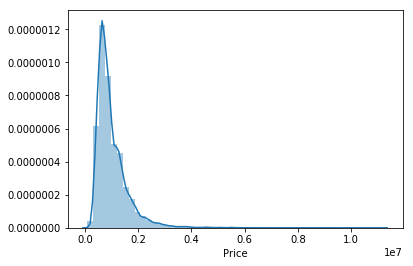

In [35]:
sns.distplot(House_Price_dropped_values)

### Categorical Variables


In [36]:
df2['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

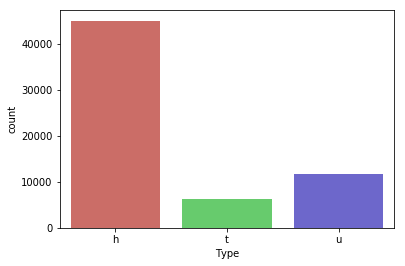

In [37]:
sns.countplot(x = 'Type', data = df2, palette = 'hls')

In [38]:
df2['CouncilArea'].value_counts().head()

Boroondara City Council    5132
Darebin City Council       4182
Banyule City Council       3656
Monash City Council        3592
Bayside City Council       3331
Name: CouncilArea, dtype: int64

In [39]:
df2['Suburb'].value_counts().head(10)

Reservoir         1241
Bentleigh East     845
Mount Waverley     831
Richmond           822
Glen Waverley      819
Craigieburn        783
Preston            699
Kew                668
Glen Iris          662
Brunswick          644
Name: Suburb, dtype: int64

In [40]:
df2['Regionname'].value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

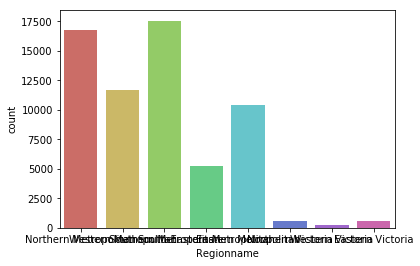

In [41]:
sns.countplot(x = 'Regionname', data = df2, palette = 'hls')